<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/Problema_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from sklearn.preprocessing import OneHotEncoder



In [ ]:
def plot_line(w1, w2, b):
    x1, x2 = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T
    
    plt.figure(0, figsize=(10,4))
  
    
    
    y_mesh = np.dot(x_mesh, np.array([w1, w2]).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)
   

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.scatter(x[:,0], x[:,1], c=y.ravel(), s=100, cmap='bwr')

    y_pred = np.dot(x, np.array([w1, w2]).T) + b
    y_bin = np.where(y_pred <= 0, 0, 1)
    print('{0} => {1}'.format(y_pred, y_bin))
 
   
    plt.show()

In [ ]:

training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

target_data = np.array([[1],[0],[1],[0]], "float32")


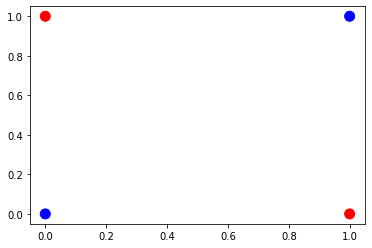

In [ ]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 0]]).T
plt.scatter(x[:,0], x[:,1], c=y.ravel(), s=100, cmap='bwr')


Epoch 0
Hypothesis [[0.4871205  0.51287943]
 [0.33808208 0.6619179 ]
 [0.65063184 0.3493682 ]
 [0.5031724  0.49682766]]
w1=[[-0.79593647  0.9394788 ]
 [ 0.6885476  -0.8942361 ]]
b1=[-0.00733338  0.00893857]
w2=[[-0.7908405  0.9328994]
 [ 0.6927817 -0.8986907]]
b2=[ 0.00394399 -0.00394397]
cost (ce)=2.8703089


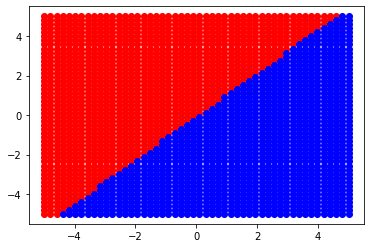


Epoch 10000
Hypothesis [[0.99773693 0.00226306]
 [0.00290442 0.9970956 ]
 [0.00295531 0.99704474]
 [0.9980432  0.00195681]]
w1=[[-6.6269484  7.523028 ]
 [ 6.9120817 -7.3929234]]
b1=[3.322451  3.7620423]
w2=[[ 6.6346493 -6.492589 ]
 [ 6.404718  -6.610616 ]]
b2=[-9.650649  9.650643]
cost (ce)=0.010092623


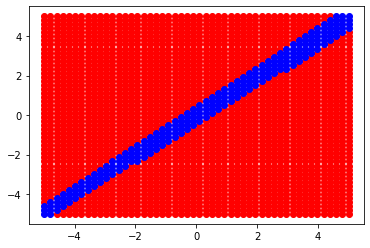


Epoch 20000
Hypothesis [[9.9895477e-01 1.0452032e-03]
 [1.3545571e-03 9.9864548e-01]
 [1.3704272e-03 9.9862957e-01]
 [9.9909222e-01 9.0778369e-04]]
w1=[[-7.0485725  7.846733 ]
 [ 7.330613  -7.6883793]]
b1=[3.5324628 3.8958764]
w2=[[ 7.3594847 -7.2174244]
 [ 7.1405964 -7.346491 ]]
b2=[-10.749451   10.7494335]
cost (ce)=0.0046807947


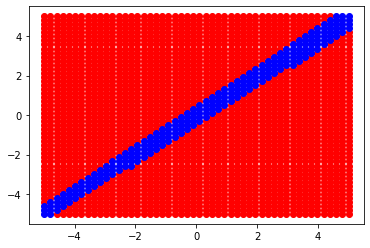

In [ ]:
def trans_for_ohe(labels):
    """Transform a flat list of labels to what one hot encoder needs."""
    return np.array(labels).reshape(len(labels), -1)


def analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T):
    """Visualize the classification."""
    print("\nEpoch %i" % i)
    print(
        "Hypothesis %s" % sess.run(hypothesis, feed_dict={input_: XOR_X, target: XOR_T})
    )
    print("w1=%s" % sess.run(w1))
    print("b1=%s" % sess.run(b1))
    print("w2=%s" % sess.run(w2))
    print("b2=%s" % sess.run(b2))
    print(
        "cost (ce)=%s"
        % sess.run(cross_entropy, feed_dict={input_: XOR_X, target: XOR_T})
    )
 
    xs = np.linspace(-5, 5)
    ys = np.linspace(-5, 5)
    pred_classes = []
    for x in xs:
        for y in ys:
            pred_class = sess.run(hypothesis, feed_dict={input_: [[x, y]]})
            pred_classes.append((x, y, pred_class.argmax()))
    xs_p, ys_p = [], []
    xs_n, ys_n = [], []
    for x, y, c in pred_classes:
        if c == 0:
            xs_n.append(x)
            ys_n.append(y)
        else:
            xs_p.append(x)
            ys_p.append(y)
    plt.plot(xs_p, ys_p, "ro", xs_n, ys_n, "bo")
    plt.show()



XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]  
XOR_Y = [0, 1, 1, 0]  
assert len(XOR_X) == len(XOR_Y)  


enc = OneHotEncoder()
enc.fit(trans_for_ohe(XOR_Y))
XOR_T = enc.transform(trans_for_ohe(XOR_Y)).toarray()


nb_classes = 2
input_ = tf.placeholder(tf.float32, shape=[None, len(XOR_X[0])], name="input")
target = tf.placeholder(tf.float32, shape=[None, nb_classes], name="output")
nb_hidden_nodes = 2


w1 = tf.Variable(
    tf.random_uniform([2, nb_hidden_nodes], -1, 1, seed=0), name="Weights1"
)
w2 = tf.Variable(
    tf.random_uniform([nb_hidden_nodes, nb_classes], -1, 1, seed=0), name="Weights2"
)
b1 = tf.Variable(tf.zeros([nb_hidden_nodes]), name="Biases1")
b2 = tf.Variable(tf.zeros([nb_classes]), name="Biases2")
activation2 = tf.sigmoid(tf.matmul(input_, w1) + b1)
hypothesis = tf.nn.softmax(tf.matmul(activation2, w2) + b2)
cross_entropy = -tf.reduce_sum(target * tf.log(hypothesis))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)


init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)

    for i in range(20001):
        sess.run(train_step, feed_dict={input_: XOR_X, target: XOR_T})

        if i % 10000 == 0:
            analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T)